# 탐색적 데이터 분석

## #01. 작업준비

### 1. 패키지 참조

In [1]:
import sys
sys.path.append('../')
import helper

import numpy as np
from pandas import read_excel, merge, DataFrame, get_dummies
from matplotlib import pyplot as plt
import seaborn as sb

### 2. 데이터 가져오기

In [21]:
origin = read_excel("분석용데이터.xlsx")

print(origin.shape)

print(origin.info())


KeyboardInterrupt: 

### 3. 명목형 변수에 대한 데이터 타입 변경

In [26]:
origin.isnull().sum()
#origin.tail()

기준_년_코드      0
기준_분기_코드     0
Covid19      9
상권_코드        0
분기당_매출_금액    9
주중_매출_금액     9
주말_매출_금액     9
남성_매출_금액     9
여성_매출_금액     9
점포수          9
일과시간_금액      9
일과이후_금액      9
청년금액         9
중년금액         9
장년금액         9
상권_코드_명      9
엑스좌표_값       9
와이좌표_값       9
시군구_코드       9
행정동_코드       9
시군구명         9
시군구코드        9
도심           9
총_직장_인구_수    0
총_생활인구_수     0
dtype: int64

In [3]:
df = origin.astype({
    '기준_년_코드': 'category', 
    '기준_분기_코드': 'category', 
    'Covid19': 'category', 
    '상권_코드': 'category', 
    '상권_코드_명': 'category', 
    '시군구_코드': 'category', 
    '행정동_코드': 'category', 
    '시군구명': 'category', 
    '시군구코드': 'category', 
    '도심': 'category'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265937 entries, 0 to 265936
Data columns (total 25 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   기준_년_코드    265937 non-null  category
 1   기준_분기_코드   265937 non-null  category
 2   Covid19    265928 non-null  category
 3   상권_코드      265937 non-null  category
 4   분기당_매출_금액  265928 non-null  float64 
 5   주중_매출_금액   265928 non-null  float64 
 6   주말_매출_금액   265928 non-null  float64 
 7   남성_매출_금액   265928 non-null  float64 
 8   여성_매출_금액   265928 non-null  float64 
 9   점포수        265928 non-null  float64 
 10  일과시간_금액    265928 non-null  float64 
 11  일과이후_금액    265928 non-null  float64 
 12  청년금액       265928 non-null  float64 
 13  중년금액       265928 non-null  float64 
 14  장년금액       265928 non-null  float64 
 15  상권_코드_명    265928 non-null  category
 16  엑스좌표_값     265928 non-null  float64 
 17  와이좌표_값     265928 non-null  float64 
 18  시군구_코드     265928 non-null  category
 19  행정

## #02. 명목형 변수에 대한 기초 통계량 확인

### 각 컬럼의 데이터 타입을 확인

In [4]:
df.dtypes

기준_년_코드      category
기준_분기_코드     category
Covid19      category
상권_코드        category
분기당_매출_금액     float64
주중_매출_금액      float64
주말_매출_금액      float64
남성_매출_금액      float64
여성_매출_금액      float64
점포수           float64
일과시간_금액       float64
일과이후_금액       float64
청년금액          float64
중년금액          float64
장년금액          float64
상권_코드_명      category
엑스좌표_값        float64
와이좌표_값        float64
시군구_코드       category
행정동_코드       category
시군구명         category
시군구코드        category
도심           category
총_직장_인구_수       int64
총_생활인구_수        int64
dtype: object

### 명목형 변수의 이름을 추출

In [5]:
cnames = []

for i, v in enumerate(df.dtypes):
    if v == 'category':
        cnames.append(df.columns[i])
        
cnames

['기준_년_코드',
 '기준_분기_코드',
 'Covid19',
 '상권_코드',
 '상권_코드_명',
 '시군구_코드',
 '행정동_코드',
 '시군구명',
 '시군구코드',
 '도심']

### 명목형 변수로만 구성된 새로운 데이터프레임을 생성

In [23]:
cdf = df[cnames]
cdf.tail(10)

,기준_년_코드,기준_분기_코드,Covid19,상권_코드,상권_코드_명,시군구_코드,행정동_코드,시군구명,시군구코드,도심
265927,2021,1,1.0,1000651,우마길,11530.0,11530595.0,구로구,11530.0,0.0
265928,2019,4,NaN,1000805,NaN,NaN,NaN,NaN,NaN,NaN
265929,2019,3,NaN,1000805,NaN,NaN,NaN,NaN,NaN,NaN
265930,2019,2,NaN,1000805,NaN,NaN,NaN,NaN,NaN,NaN
265931,2020,4,NaN,1000805,NaN,NaN,NaN,NaN,NaN,NaN
265932,2020,3,NaN,1000805,NaN,NaN,NaN,NaN,NaN,NaN
265933,2020,2,NaN,1000805,NaN,NaN,NaN,NaN,NaN,NaN
265934,2020,1,NaN,1000805,NaN,NaN,NaN,NaN,NaN,NaN
265935,2021,2,NaN,1000805,NaN,NaN,NaN,NaN,NaN,NaN
265936,2021,1,NaN,1000805,NaN,NaN,NaN,NaN,NaN,NaN


### 확인이 필요한 컬럼에 대한 카운트 플롯

c:\Users\MegaIT302-02\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\MegaIT302-02\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\MegaIT302-02\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\MegaIT302-02\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\MegaIT302-02\AppData\Local\Programs\Python\Python39\lib\site-packag

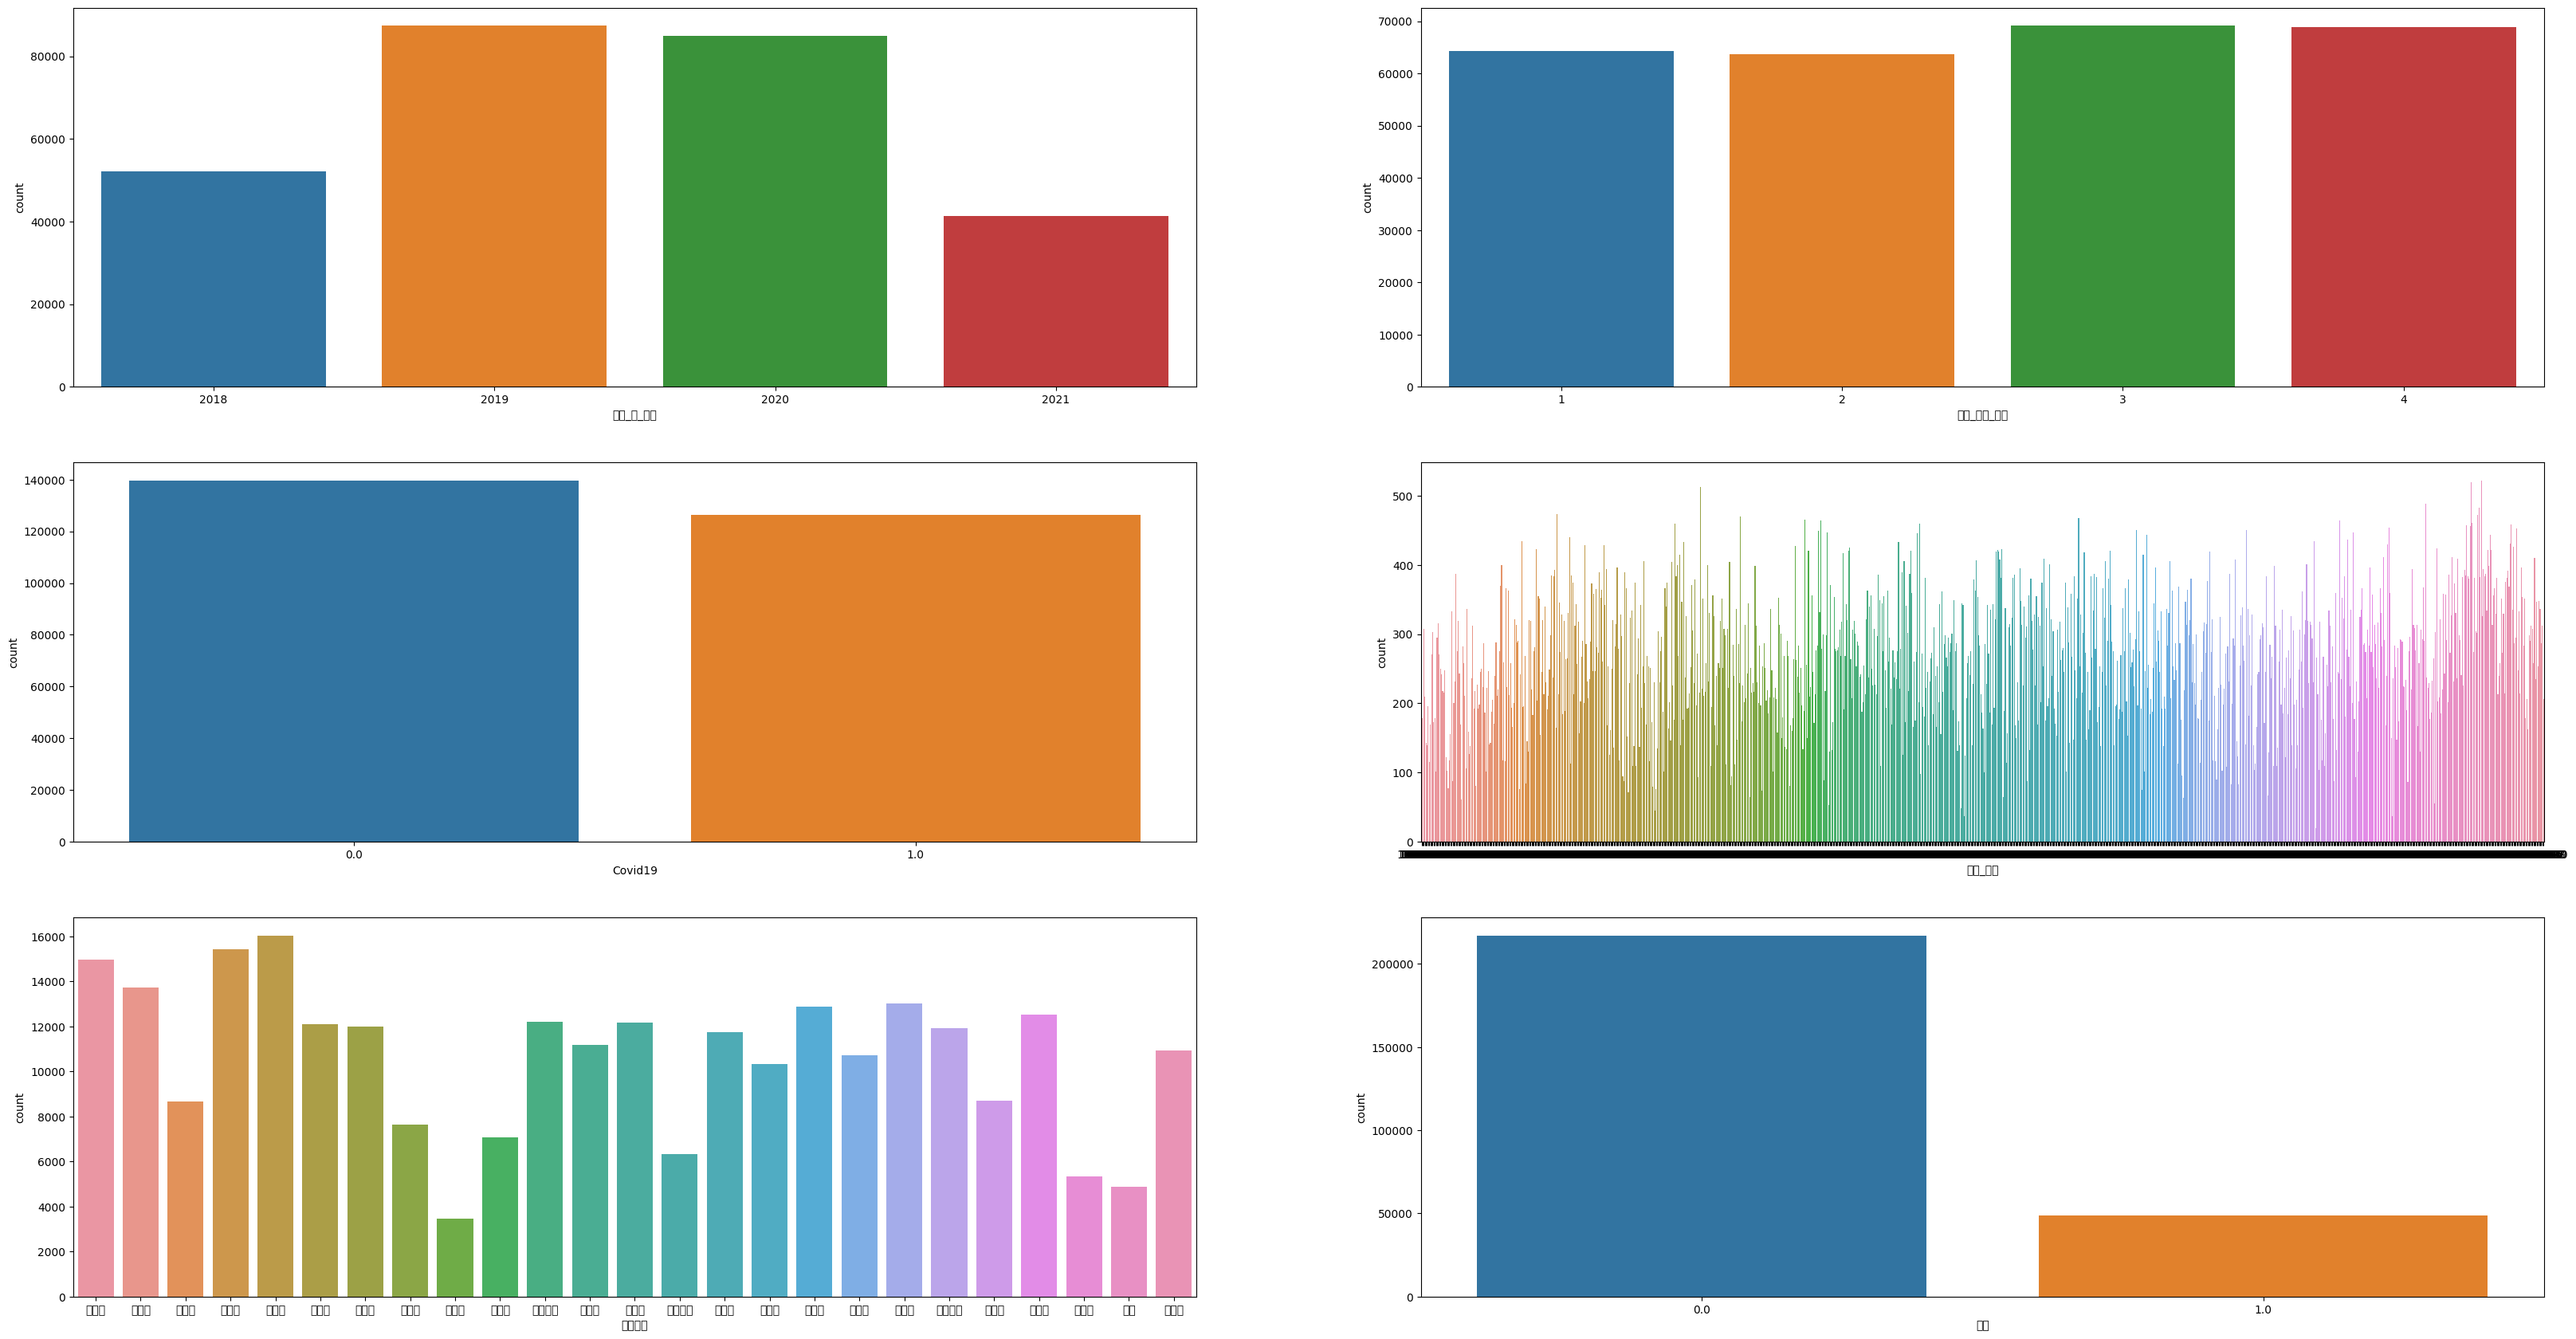

In [7]:
target = ['기준_년_코드','기준_분기_코드','Covid19','상권_코드','시군구명','도심']

rows = round(len(target) / 2)

fig, ax = plt.subplots(rows, 2, figsize=(40, 7*rows))

for i, v in enumerate(target):
    r = int(i / 2)
    c = i % 2
    sb.countplot(x=v, data=cdf, ax=ax[r][c])
    
plt.show()
plt.close()

## #03. 연속형 변수에 대한 기초 통계량 확인

### 결측치 확인

In [8]:
df.isna().sum()

기준_년_코드      0
기준_분기_코드     0
Covid19      9
상권_코드        0
분기당_매출_금액    9
주중_매출_금액     9
주말_매출_금액     9
남성_매출_금액     9
여성_매출_금액     9
점포수          9
일과시간_금액      9
일과이후_금액      9
청년금액         9
중년금액         9
장년금액         9
상권_코드_명      9
엑스좌표_값       9
와이좌표_값       9
시군구_코드       9
행정동_코드       9
시군구명         9
시군구코드        9
도심           9
총_직장_인구_수    0
총_생활인구_수     0
dtype: int64

### 결측치가 있는 데이터의 내용을 확인

In [9]:
null_df = df.query('(총_직장_인구_수.isnull()) or (총_생활인구_수.isnull())')
null_df

,기준_년_코드,기준_분기_코드,Covid19,상권_코드,분기당_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,점포수,...,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,시군구명,시군구코드,도심,총_직장_인구_수,총_생활인구_수


> 생활인구가 집계되지 않은 지역은 행정구에서 데이터 수집이 이루어지 않은 것으로 보고 분석에서 제외하기로 함

### 결측치 정제

In [10]:
df2 = df.dropna()
df2.isna().sum()

print(df2.shape)

(265928, 25)


### 기초 통계량 확인

In [11]:
tmp = df2.drop(['엑스좌표_값', '와이좌표_값'], axis=1)
tmp.describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
분기당_매출_금액,2.491156e+08,7.155273e+08,8.0,19385254.00,67958130.0,2.206690e+08,9.334306e+10
주중_매출_금액,1.890894e+08,5.802866e+08,-70301897.0,14401136.50,50635893.0,1.665412e+08,9.060803e+10
주말_매출_금액,6.002625e+07,1.844163e+08,-60053636.0,2470771.25,13580866.5,5.077027e+07,1.187360e+10
남성_매출_금액,1.211154e+08,3.546736e+08,0.0,7635753.25,30244104.5,1.046423e+08,4.468054e+10
여성_매출_금액,1.038996e+08,3.202041e+08,-7499697.0,6644129.75,26931961.0,9.149827e+07,2.358525e+10
점포수,4.665669e+00,6.393126e+00,0.0,2.00,3.0,5.000000e+00,3.900000e+02
일과시간_금액,1.367521e+08,4.979091e+08,-23926190.0,6570390.00,30422435.5,1.143886e+08,6.369344e+10
일과이후_금액,1.123635e+08,3.054073e+08,-86927726.0,6528123.75,26460168.5,9.311159e+07,2.964962e+10
청년금액,8.026617e+07,2.244493e+08,-3685222.0,3439479.50,16588339.0,6.560932e+07,1.568936e+10
중년금액,1.074401e+08,3.482783e+08,0.0,7668618.25,28746872.0,9.204336e+07,3.420627e+10


### 상자그림 확인

c:\Users\MegaIT302-02\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\MegaIT302-02\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\MegaIT302-02\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\MegaIT302-02\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\MegaIT302-02\AppData\Local\Programs\Python\Python39\lib\site-packag

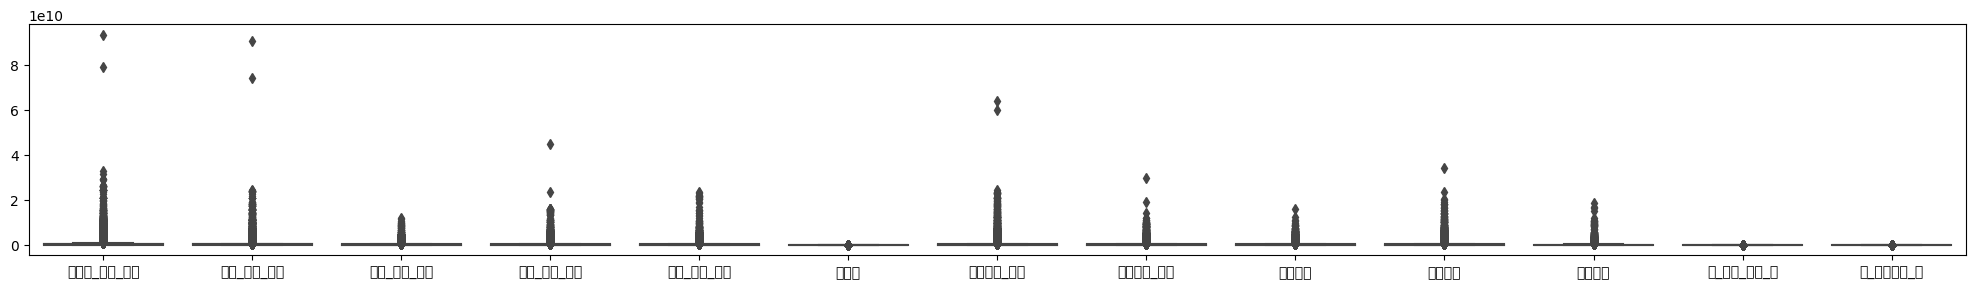

In [12]:
plt.figure(figsize=(25, 3))
sb.boxplot(tmp)
plt.show()
plt.close()

> 무조건 표준화~!!!

### 데이터 표준화

#### 명목형을 제외한 연속형 변수만 추출

In [13]:
ndf = df.drop(cnames, axis=1)
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265937 entries, 0 to 265936
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   분기당_매출_금액  265928 non-null  float64
 1   주중_매출_금액   265928 non-null  float64
 2   주말_매출_금액   265928 non-null  float64
 3   남성_매출_금액   265928 non-null  float64
 4   여성_매출_금액   265928 non-null  float64
 5   점포수        265928 non-null  float64
 6   일과시간_금액    265928 non-null  float64
 7   일과이후_금액    265928 non-null  float64
 8   청년금액       265928 non-null  float64
 9   중년금액       265928 non-null  float64
 10  장년금액       265928 non-null  float64
 11  엑스좌표_값     265928 non-null  float64
 12  와이좌표_값     265928 non-null  float64
 13  총_직장_인구_수  265937 non-null  int64  
 14  총_생활인구_수   265937 non-null  int64  
dtypes: float64(13), int64(2)
memory usage: 30.4 MB


#### 데이터 표준화

In [14]:
std_ndf = helper.scalling(ndf)
std_ndf.head()

,분기당_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,점포수,일과시간_금액,일과이후_금액,청년금액,중년금액,장년금액,엑스좌표_값,와이좌표_값,총_직장_인구_수,총_생활인구_수
0,-0.093174,-0.012790,-0.321266,-0.112799,-0.063258,0.052296,-0.141795,0.012877,-0.309039,0.133257,-0.224244,0.668358,0.491995,-0.394192,-1.329702
1,-0.341783,-0.319948,-0.319350,-0.341485,-0.310236,-0.416959,-0.270780,-0.359295,-0.356415,-0.296167,-0.224244,0.668358,0.491995,-0.394192,-1.329702
2,-0.227556,-0.191080,-0.281653,-0.233631,-0.174450,-0.573378,-0.181047,-0.237971,-0.280741,-0.110260,-0.224244,0.668358,0.491995,-0.394192,-1.329702
3,-0.216867,-0.221583,-0.144200,-0.212989,-0.211614,-0.573378,-0.238861,-0.118672,-0.166785,-0.209664,-0.197412,0.668358,0.491995,-0.394192,-1.329702
4,2.016991,2.008761,1.505045,1.037640,0.287276,-0.573378,2.199311,1.139970,0.262938,0.746152,0.848232,0.668358,0.491995,-0.394192,-1.329702


#### 표준화 결과에 대한 상자그림

c:\Users\MegaIT302-02\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\MegaIT302-02\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\MegaIT302-02\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\MegaIT302-02\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\MegaIT302-02\AppData\Local\Programs\Python\Python39\lib\site-packag

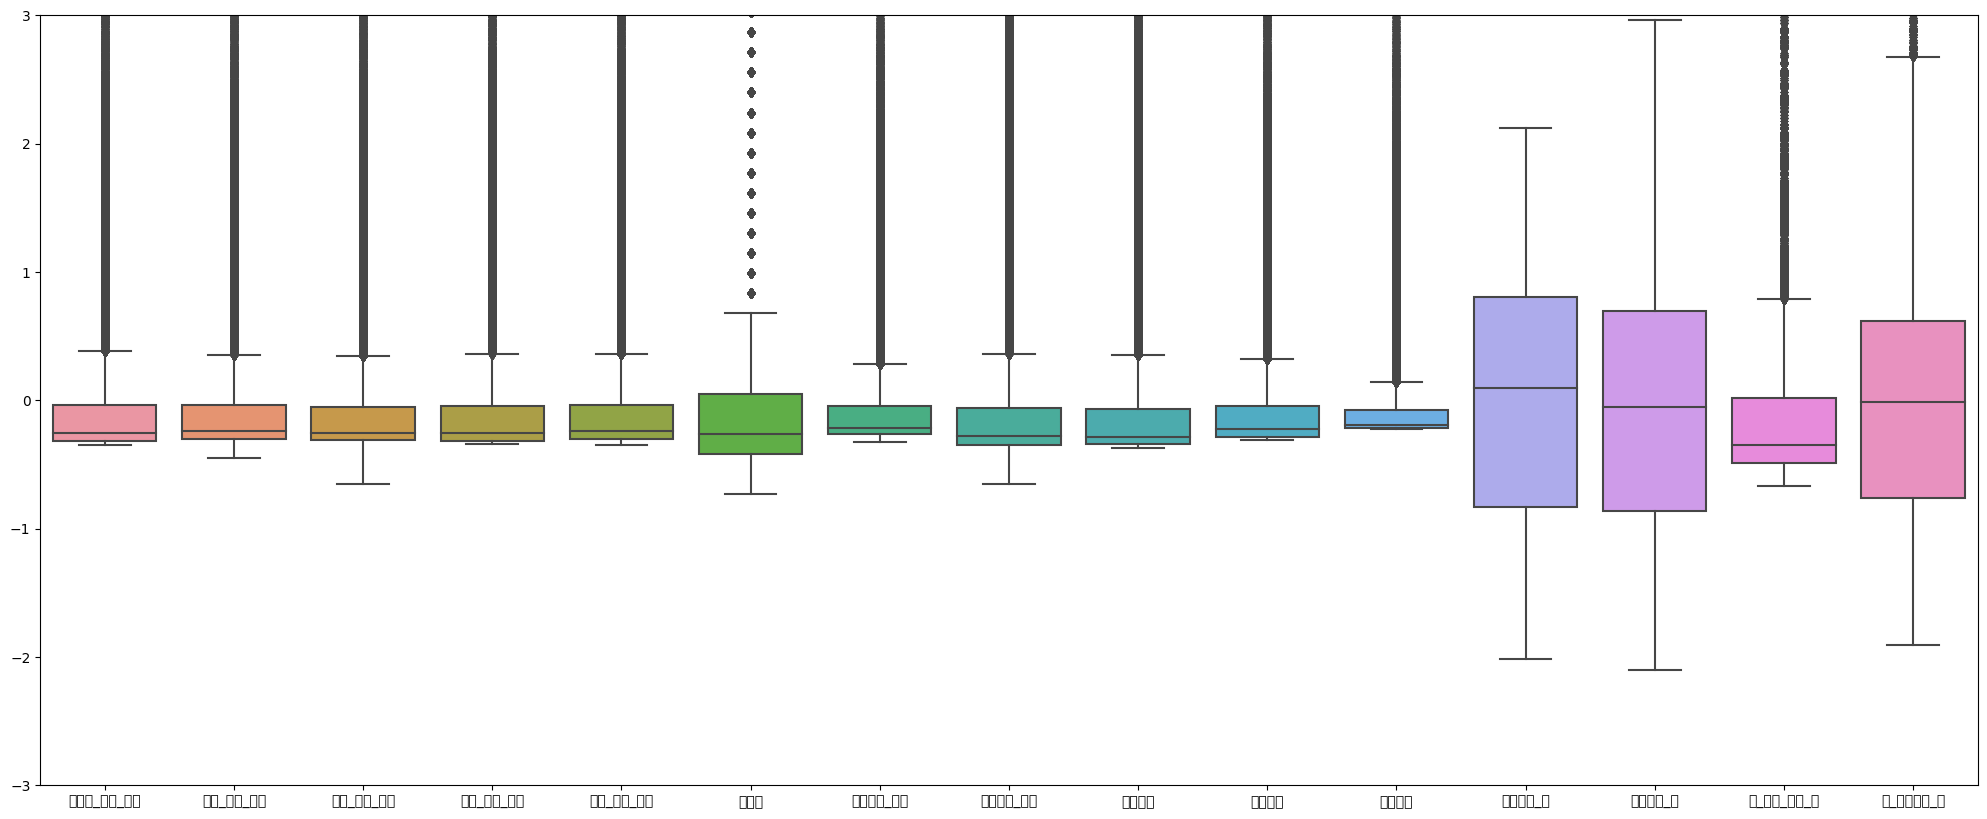

In [15]:
plt.figure(figsize=(25, 10))
sb.boxplot(std_ndf)
plt.ylim(-3,3)
plt.show()
plt.close()

> 데이터 분포가 비슷해졌으므로 학습모델 구성에 활용해도 좋다고 판단

## #04. 최종 데이터 프레임 구성

### 연속형과 명목형 데이터 결합

In [20]:
fdf = merge(std_ndf, cdf, left_index=True, right_index=True)
#fdf.dropna(inplace=True)
fdf.to_excel("fdf.xlsx", index=False)
fdf

,분기당_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,점포수,일과시간_금액,일과이후_금액,청년금액,중년금액,...,기준_년_코드,기준_분기_코드,Covid19,상권_코드,상권_코드_명,시군구_코드,행정동_코드,시군구명,시군구코드,도심
0,-0.093174,-0.012790,-0.321266,-0.112799,-0.063258,0.052296,-0.141795,0.012877,-0.309039,0.133257,...,2018,3,0.0,1000094,마장로39길,11200.0,11200540.0,성동구,11200.0,0.0
1,-0.341783,-0.319948,-0.319350,-0.341485,-0.310236,-0.416959,-0.270780,-0.359295,-0.356415,-0.296167,...,2018,3,0.0,1000094,마장로39길,11200.0,11200540.0,성동구,11200.0,0.0
2,-0.227556,-0.191080,-0.281653,-0.233631,-0.174450,-0.573378,-0.181047,-0.237971,-0.280741,-0.110260,...,2018,3,0.0,1000094,마장로39길,11200.0,11200540.0,성동구,11200.0,0.0
3,-0.216867,-0.221583,-0.144200,-0.212989,-0.211614,-0.573378,-0.238861,-0.118672,-0.166785,-0.209664,...,2018,3,0.0,1000094,마장로39길,11200.0,11200540.0,성동구,11200.0,0.0
4,2.016991,2.008761,1.505045,1.037640,0.287276,-0.573378,2.199311,1.139970,0.262938,0.746152,...,2018,3,0.0,1000094,마장로39길,11200.0,11200540.0,성동구,11200.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020,3,NaN,1000805,NaN,NaN,NaN,NaN,NaN,NaN
265933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020,2,NaN,1000805,NaN,NaN,NaN,NaN,NaN,NaN
265934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020,1,NaN,1000805,NaN,NaN,NaN,NaN,NaN,NaN
265935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2021,2,NaN,1000805,NaN,NaN,NaN,NaN,NaN,NaN


## #05. 구 단위 코로나 전후 매출액 비교

In [17]:
tmp = df.filter(['시군구명', 'Covid19', '분기당_매출_금액']).groupby(['시군구명', 'Covid19'], as_index=False).mean()
tmp

,시군구명,Covid19,분기당_매출_금액
0,강남구,0.0,3.777450e+08
1,강남구,1.0,4.067136e+08
2,강동구,0.0,2.207858e+08
3,강동구,1.0,2.341338e+08
4,강북구,0.0,1.810091e+08
5,강북구,1.0,1.767230e+08
6,강서구,0.0,2.114053e+08
7,강서구,1.0,2.244594e+08
8,관악구,0.0,2.043014e+08
9,관악구,1.0,2.015775e+08


C:\Users\MegaIT302-02\AppData\Local\Temp\ipykernel_5168\4112760754.py:4: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  plt.savefig('구단위_매출평균_비교.png', dpi=200, pad_inches=0)
C:\Users\MegaIT302-02\AppData\Local\Temp\ipykernel_5168\4112760754.py:4: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  plt.savefig('구단위_매출평균_비교.png', dpi=200, pad_inches=0)
C:\Users\MegaIT302-02\AppData\Local\Temp\ipykernel_5168\4112760754.py:4: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  plt.savefig('구단위_매출평균_비교.png', dpi=200, pad_inches=0)
C:\Users\MegaIT302-02\AppData\Local\Temp\ipykernel_5168\4112760754.py:4: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  plt.savefig('구단위_매출평균_비교.png', dpi=200, pad_inches=0)
C:\Users\MegaIT302-02\AppData\Local\Temp\ipykernel_5168\4112760754.py:4: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  plt.savefig('구단위_매

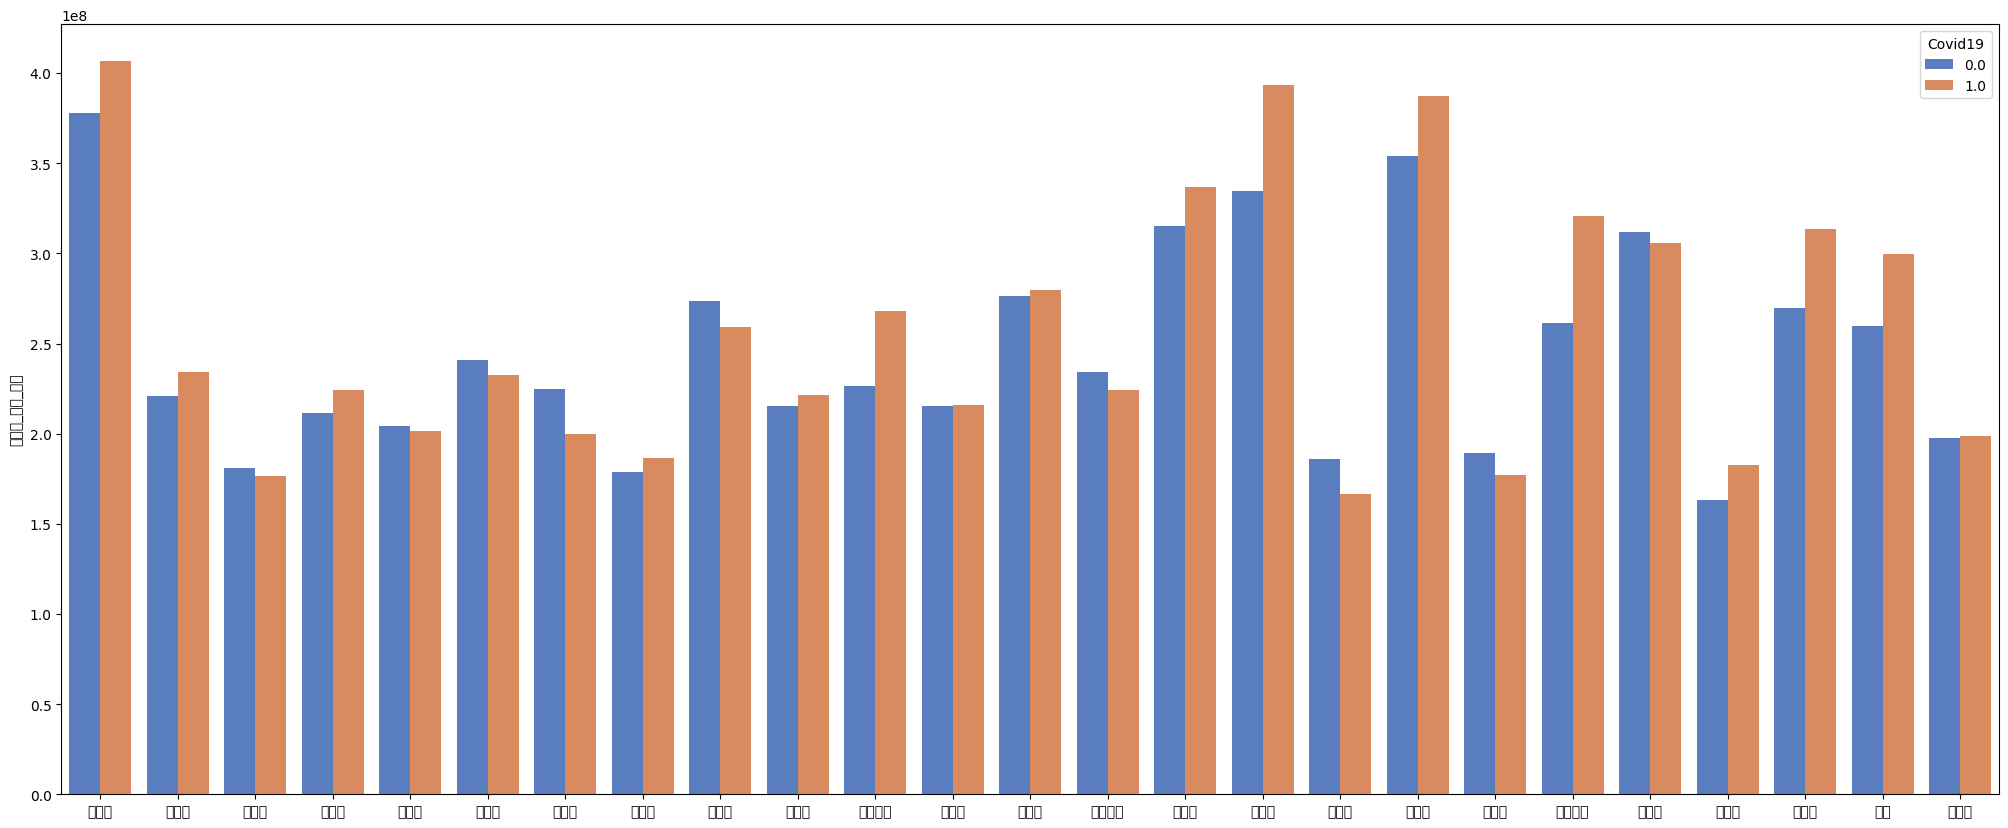

In [18]:
plt.figure(figsize=(25, 10))
sb.barplot(data=tmp, x='시군구명', y='분기당_매출_금액', hue='Covid19', palette='muted')
plt.xlabel(None)
plt.savefig('구단위_매출평균_비교.png', dpi=200, pad_inches=0)
plt.show()
plt.close()